<a href="https://colab.research.google.com/github/AnaFerreira015/dip-2024-2/blob/main/task_06_geometric_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def apply_geometric_transformations(img: np.ndarray) -> dict:
    h, w = img.shape

    # 1. Translação: desloca para baixo e direita com preenchimento zero
    def translate(img, shift_x=20, shift_y=20):
        translated = np.zeros_like(img)
        translated[shift_y:, shift_x:] = img[:h-shift_y, :w-shift_x]
        return translated

    # 2. Rotação 90° sentido horário
    def rotate_90_clockwise(img):
        return np.rot90(img, k=3)  # 3x90 = 270 graus = horário

    # 3. Esticamento horizontal (1.5x na largura)
    def stretch_horizontal(img, scale=1.5):
        new_w = int(w * scale)
        stretched = np.zeros((h, new_w), dtype=img.dtype)
        for y in range(h):
            for x in range(new_w):
                src_x = int(x / scale)
                if src_x < w:
                    stretched[y, x] = img[y, src_x]
        return stretched

    # 4. Espelhamento horizontal
    def mirror_horizontal(img):
        return img[:, ::-1]

    # 5. Distorção tipo "barrel"
    def barrel_distortion(img, k=0.0005):
        y_indices, x_indices = np.indices((h, w))
        x_c = w / 2
        y_c = h / 2

        x_n = (x_indices - x_c) / x_c
        y_n = (y_indices - y_c) / y_c

        r = np.sqrt(x_n**2 + y_n**2)
        factor = 1 + k * r**2

        x_distorted = x_n * factor
        y_distorted = y_n * factor

        x_src = (x_distorted * x_c + x_c).astype(int)
        y_src = (y_distorted * y_c + y_c).astype(int)

        distorted = np.zeros_like(img)
        mask = (x_src >= 0) & (x_src < w) & (y_src >= 0) & (y_src < h)
        distorted[y_indices[mask], x_indices[mask]] = img[y_src[mask], x_src[mask]]

        return distorted

    return {
        "translated": translate(img),
        "rotated": rotate_90_clockwise(img),
        "stretched": stretch_horizontal(img),
        "mirrored": mirror_horizontal(img),
        "distorted": barrel_distortion(img)
    }

In [14]:
uploaded = files.upload()

Saving paisagem.jpeg to paisagem.jpeg


In [17]:
img = Image.open("paisagem.jpeg").convert("L")
img = np.asarray(img).astype(np.float32) / 255.0

In [18]:
resultados = apply_geometric_transformations(img)

In [19]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

(np.float64(-0.5), np.float64(719.5), np.float64(1279.5), np.float64(-0.5))

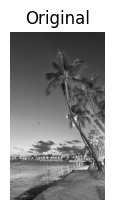

In [20]:
# Original
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

(np.float64(-0.5), np.float64(719.5), np.float64(1279.5), np.float64(-0.5))

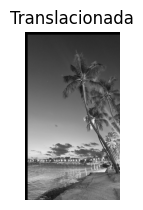

In [21]:
# Translacionada
plt.subplot(2, 3, 2)
plt.imshow(resultados["translated"], cmap='gray')
plt.title("Translacionada")
plt.axis("off")

(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

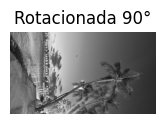

In [22]:
# Rotacionada
plt.subplot(2, 3, 3)
plt.imshow(resultados["rotated"], cmap='gray')
plt.title("Rotacionada 90°")
plt.axis("off")

(np.float64(-0.5), np.float64(1079.5), np.float64(1279.5), np.float64(-0.5))

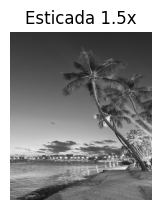

In [23]:
# Esticada
plt.subplot(2, 3, 4)
plt.imshow(resultados["stretched"], cmap='gray')
plt.title("Esticada 1.5x")
plt.axis("off")

(np.float64(-0.5), np.float64(719.5), np.float64(1279.5), np.float64(-0.5))

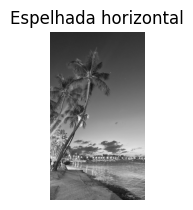

In [24]:
# Espelhada
plt.subplot(2, 3, 5)
plt.imshow(resultados["mirrored"], cmap='gray')
plt.title("Espelhada horizontal")
plt.axis("off")

(np.float64(-0.5), np.float64(719.5), np.float64(1279.5), np.float64(-0.5))

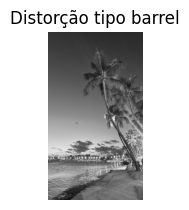

In [25]:
# Distorcida
plt.subplot(2, 3, 6)
plt.imshow(resultados["distorted"], cmap='gray')
plt.title("Distorção tipo barrel")
plt.axis("off")

In [26]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>